In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [6]:
df = pd.read_csv("../data/processed/sales_data.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     51290 non-null  float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

df["order_date"] = pd.to_datetime(df["order_date"])

df["price"] = df["sales"] / df["quantity"]
df["revenue"] = df["sales"]   # sales is already revenue

<Axes: title={'center': 'Demand Over Time'}, xlabel='order_date'>

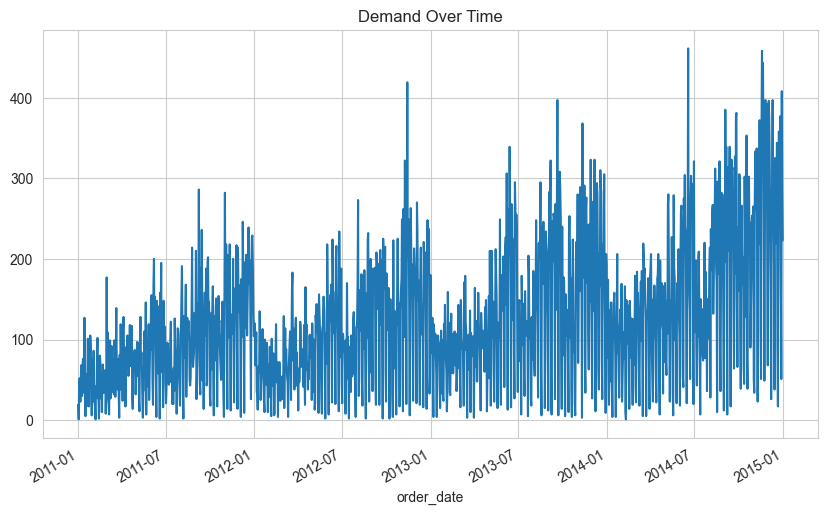

In [ ]:
daily_sales = df.groupby("order_date")["quantity"].sum()
daily_sales.plot(title="Demand Over Time")

#this step is used to detect seasonality
#Identify high demand periods

<Axes: title={'center': 'Revenue Over Time'}, xlabel='order_date'>

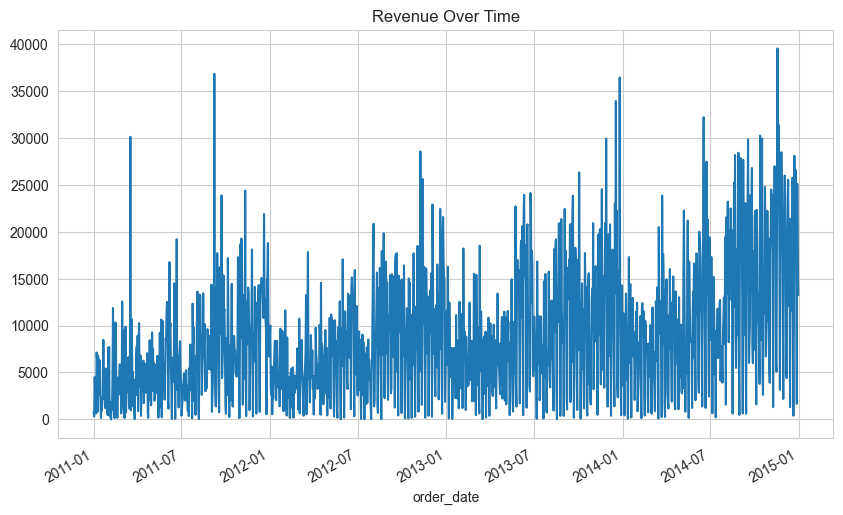

In [11]:
df.groupby("order_date")["sales"].sum().plot(title="Revenue Over Time")

<Axes: xlabel='price', ylabel='quantity'>

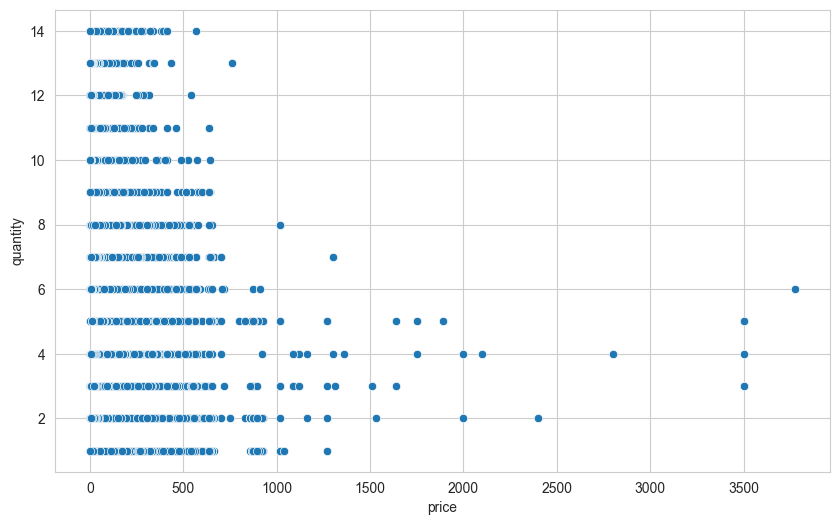

In [12]:
import seaborn as sns
sns.scatterplot(x="price", y="quantity", data=df)

In [13]:
#correlation
df[["price","quantity"]].corr()

,price,quantity
price,1.000000,-0.010161
quantity,-0.010161,1.000000


<Axes: xlabel='discount', ylabel='quantity'>

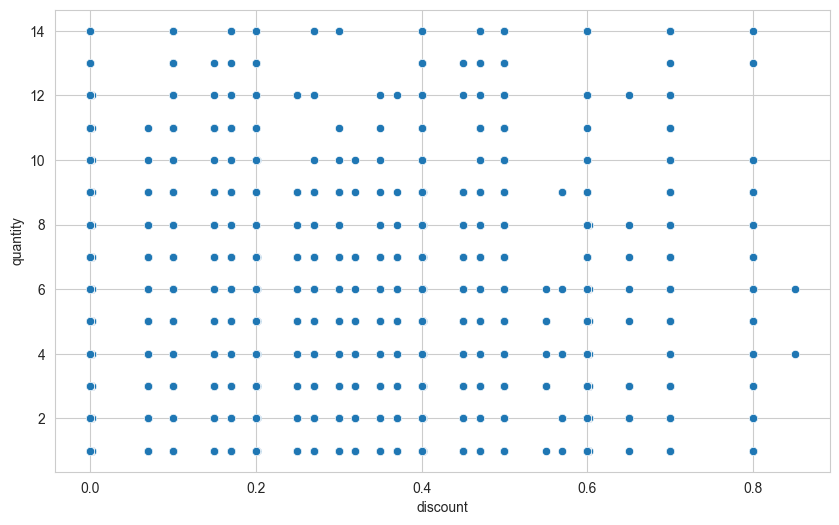

In [ ]:
sns.scatterplot(x="discount", y="quantity", data=df)

#It tells us that discount increase sales

<Axes: xlabel='category'>

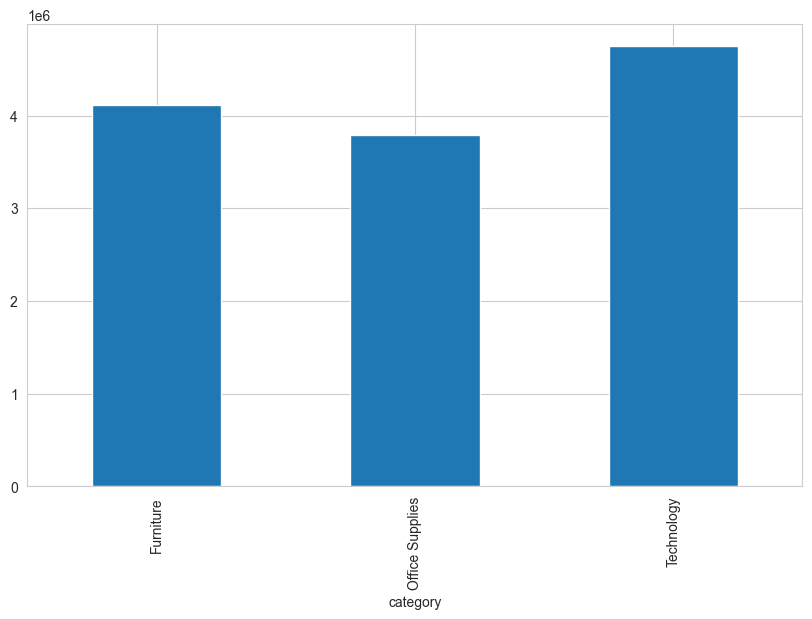

In [ ]:
#category wise analysis
#1e6 means millions

df.groupby("category")["sales"].sum().plot(kind="bar")

<Axes: xlabel='segment'>

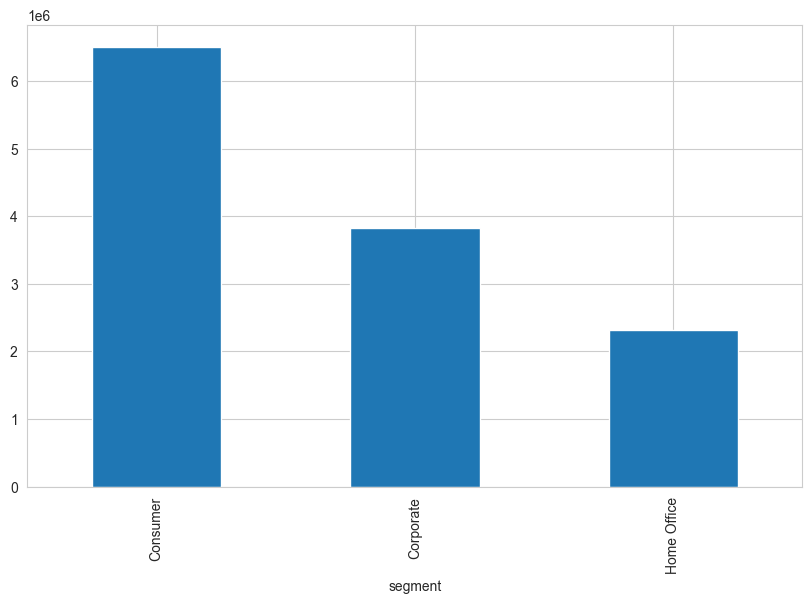

In [ ]:
#segment-wise revenue
df.groupby("segment")["sales"].sum().plot(kind="bar")

#It says consumer segment may tolerate higher prices than corporate customers.

<Axes: xlabel='category'>

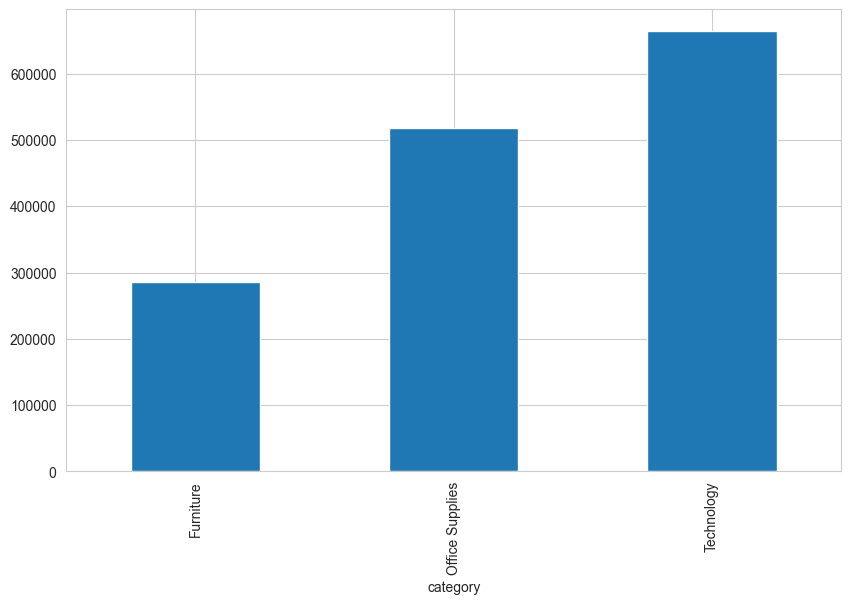

In [17]:
#profit analysis
df.groupby("category")["profit"].sum().plot(kind="bar")

<Axes: xlabel='month'>

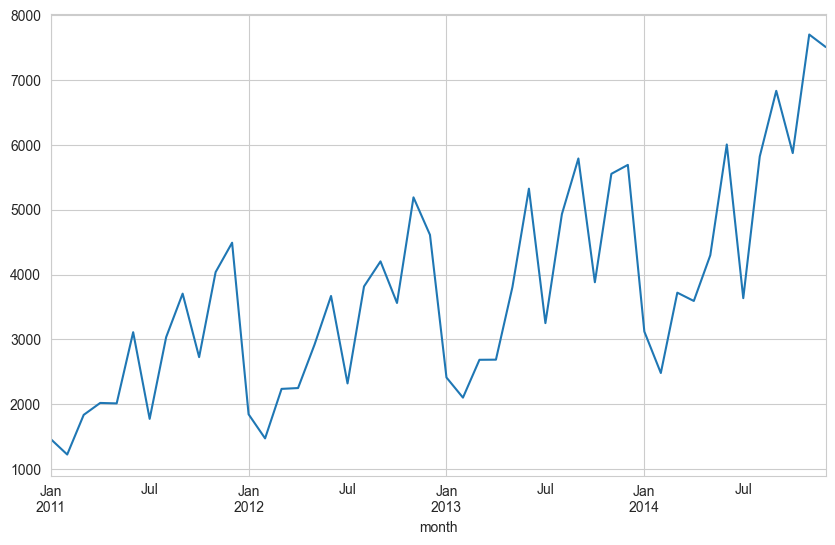

In [18]:
df["month"] = df["order_date"].dt.to_period("M")
df.groupby("month")["quantity"].sum().plot()

In [19]:
df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64